In [1]:
%run ../_preamble.ipynb
from _work.src.modules import AutoEncoder, train_model, plot_metrics, plot_tensor, eval_model, get_distances, get_closest_item
from _work.src.modules.replay import get_attractors, iterate
from _work.src.modules.utils import save_metrics, load_metrics, round_tensor
from _work.src.data import medium_dataloader, small_dataloader as dataloader, large_dataloader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

palette = {
    'Oak': '#B0E65A',
    'Pine': '#75993C',
    'Daisy': '#FEB756',
    'Rose': '#E6634E',
    'Salmon': '#9194E3',
    'Sunfish': '#8BCBD9',
    'Canary': '#FFD92F',
    'Robin': '#FF8C9A',
}

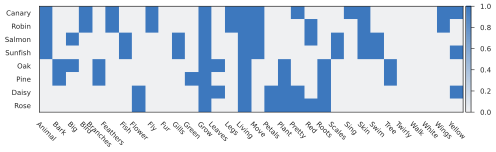

In [2]:
fig, ax = plt.subplots(figsize=(7, 3))
plot_tensor(large_dataloader.dataset.df.reindex(
    # columns=[
    #     "Living",
    #     "Grow",
    #     "Move",
    #     "Animal",
    #     "Skin",
    #     "Bird",
    #     "Feathers",
    #     "Wings",
    #     "Fly",
    #     "Fish",
    #     "Scales",
    #     "Swim",
    #     "Gills",
    #     "Sing",
    #     "Red",
    #     "Yellow",
    #     "Green",
    #     "Tree",
    #     "Big",
    #     "Leaves",
    #     "Bark",
    #     "Branches",
    #     "Petals",
    #     "Pretty",
    #     "Flower",
    #     "Plant",
    #     "Roots",
    # ],
    index=[
        "Canary",
        "Robin",
        "Salmon",
        "Sunfish",
        "Oak",
        "Pine",
        "Daisy",
        "Rose",
    ],
), ax=ax);

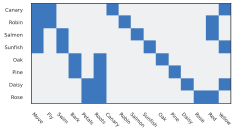

In [3]:
df = medium_dataloader.dataset.df.reindex(
    columns=[
        "Living",
        "Grow",
        "Move",
        "Animal",
        "Skin",
        "Bird",
        "Feathers",
        "Wings",
        
        "Fish",
        "Scales",
        
        "Fly",
        "Swim",
        "Gills",
        "Sing",

        # "Sunfish",
        # "Salmon",
        # "Robin",
        # "Canary",

        # "Rose",
        # "Daisy",
        # "Pine",
        # "Oak",

        "Canary",
        "Robin",
        "Salmon",
        "Sunfish",
        "Oak",
        "Pine",
        "Daisy",
        "Rose",

        

        "Red",
        "Yellow",
        "Green",
        "Tree",
        "Big",
        "Leaves",
        
        "Branches",
        "Bark",
        "Petals",
        
        "Pretty",
        "Flower",
        "Plant",
        "Roots",
    ],
    index=[
        "Canary",
        "Robin",
        "Salmon",
        "Sunfish",
        "Oak",
        "Pine",
        "Daisy",
        "Rose",
    ],
)

df = df.drop(
    columns=list(
        filter(
            lambda x: x
            not in [
                # "Grow",
                "Move",
                "Roots",
                "Fly",
                "Swim",
                "Bark",
                "Petals",

                "Red",
                "Yellow",

                "Canary",
                "Robin",
                "Salmon",
                "Sunfish",
                "Oak",
                "Pine",
                "Daisy",
                "Rose",
            ],
            df.columns,
        )
    )
)

id = np.identity(len(df.index), dtype=int)
for item, col in zip(df.index, id.T):
    df[item] = col

df = df.reindex(columns=[
  "Move",
  "Fly",
  "Swim",

  "Bark",
  "Petals",
  "Roots",

  *df.index,

  "Red",
  "Yellow"
])

# df.loc["Rose", "Red"] = 0
# df.loc["Daisy", "Yellow"] = 0

# fig, ax = plt.subplots(figsize=(2.351, 1.476665))
fig, ax = plt.subplots()
plot_tensor(df, colorbar=False, ax=ax)
plt.xticks(fontsize=5);
plt.yticks(fontsize=5);
# plt.savefig("../plots/dataset_FINAL")

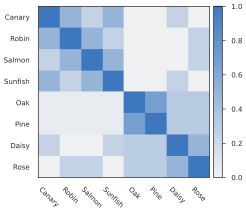

In [22]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.spatial.distance import cdist

dists = cdist(df, df, metric="correlation")
# dists_normed = Normalizer().fit_transform(dists)
dists_normed = MinMaxScaler().fit_transform(dists)
sims_normed = torch.tensor(1 - dists_normed)
plot_tensor(pd.DataFrame(sims_normed.numpy(), index=df.index, columns=df.index));
dists_normed.max()

# plot_tensor(min_normed)
plt.savefig('../plots/dists_normed')

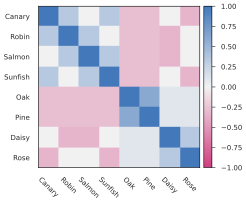

In [4]:
plot_tensor(df.T.corr());
# plt.savefig('../plots/correlation_matrix_FINAL')

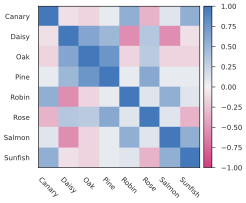

In [5]:
plot_tensor(dataloader.dataset.df.T.corr());

In [21]:
list(reversed(["Roots",
        "Plant",

        "Flower",
        "Pretty",
        "Petals",
        "Branches",
        "Bark",
        "Leaves",
        "Big",
        "Tree",
        
        "Red",
        "Yellow",
        "Green",]))

['Green',
 'Yellow',
 'Red',
 'Tree',
 'Big',
 'Leaves',
 'Bark',
 'Branches',
 'Petals',
 'Pretty',
 'Flower',
 'Plant',
 'Roots']

In [10]:
var = df.var()
(var/sum(var)).sort_values(ascending=False)

Move       0.096386
Roots      0.096386
Red        0.090361
Yellow     0.090361
Fly        0.072289
Swim       0.072289
Bark       0.072289
Petals     0.072289
Canary     0.042169
Robin      0.042169
Salmon     0.042169
Sunfish    0.042169
Oak        0.042169
Pine       0.042169
Daisy      0.042169
Rose       0.042169
dtype: float64